# WeatherPy

----
#### API Homework Assignment:  _OpenWeatherMap Data for Random Cities (Using CitiPy)_
#### By: _Ryan Zimmerlee_
#### Date: _3/3/2019_

### Analysis
* In looking at the __Latitude vs. Temperature__ scatter plot, it can be quickly determined that as you approach the equator, city temperature rises.  This would make sense as the sun is closest to the equator.  In addition, there is deeper dip in temperature as you go further north.  During the Winter season, the southern hemisphere is closer to the sun as the earth's axis tilts.  
* The __Latitude vs. Humidity__ scatter plot does not contain any clear or discernable trends, however, it is interesting to note that between 0 and -20, there seems be a small cluster of cities that have around 100% humidity. In taking a deeper look, 17 of these cities were in Brazil, with the runner ups (between 6-8 cities) being Papa New Guinea, Ecuador, Peru, and Indonesia.  (*This only applies to data pulled on 3/5*) 
* Again, there isn't any directly observable trend or correlation when looking at the __Latitude vs. Cloudiness__ scatter plot.  However, there are some grouped bands that appear when looking at some clusters of cities between 40 and 60 degrees latitude.  Between 40 and 60, there seems to be a group of cities that are all around the 90% cloudiness mark.  
---


In [2]:
!pip install citipy

  Running setup.py bdist_wheel for citipy: started
  Running setup.py bdist_wheel for citipy: finished with status 'done'
  Stored in directory: C:\Users\ryanz\AppData\Local\pip\Cache\wheels\6f\07\0d\0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import PPrint
from pprint import pprint as p

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Create empty lists for for loop
city_name, cloudiness, country, date, humidity, lat, lng, max_temp, windspeed = [], [], [], [], [], [], [], [], []

# # Test the dataframe
# cities_df

# Create URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

# Test and look into the JSON object for the needed fields
# response = requests.get(query_url + city).json()
# p(response)

# Create for loop
for city in cities:
    
    # Find index of each iteration and place it in a variable (add +1 to account for 0th index)
    index = cities.index(city)+1
    
    # Create a print log for each city in the above dataframe
    print(f"Retrieving Weather Data for {city}. ({index} of {len(cities)})")
    
    # Create URL and make the API request using OpenWeatherMapy
    response = requests.get(query_url + city).json()
    # response
    
    # Error handling in case a city isn't listed - which shouldn't happen
    # Append each value to the associated list for dataframe creation later on
    try:
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        
    # If missing, print:
    except:
        print("Missing data for city... skipping and will not include in dataset.")
    
    # Print to separate each item in the log
    print("------------------------------------------")


Retrieving Weather Data for bilma. (1 of 603)
------------------------------------------
Retrieving Weather Data for yellowknife. (2 of 603)
------------------------------------------
Retrieving Weather Data for igrim. (3 of 603)
------------------------------------------
Retrieving Weather Data for illoqqortoormiut. (4 of 603)
Missing field/result... skipping.
------------------------------------------
Retrieving Weather Data for itaituba. (5 of 603)
------------------------------------------
Retrieving Weather Data for kyra. (6 of 603)
Missing field/result... skipping.
------------------------------------------
Retrieving Weather Data for cape town. (7 of 603)
------------------------------------------
Retrieving Weather Data for new norfolk. (8 of 603)
------------------------------------------
Retrieving Weather Data for coquimbo. (9 of 603)
------------------------------------------
Retrieving Weather Data for hobart. (10 of 603)
------------------------------------------
Retrievi

------------------------------------------
Retrieving Weather Data for iqaluit. (86 of 603)
------------------------------------------
Retrieving Weather Data for phuket. (87 of 603)
------------------------------------------
Retrieving Weather Data for punta arenas. (88 of 603)
------------------------------------------
Retrieving Weather Data for krasnoselkup. (89 of 603)
Missing field/result... skipping.
------------------------------------------
Retrieving Weather Data for yar-sale. (90 of 603)
------------------------------------------
Retrieving Weather Data for margate. (91 of 603)
------------------------------------------
Retrieving Weather Data for ambilobe. (92 of 603)
------------------------------------------
Retrieving Weather Data for mama. (93 of 603)
------------------------------------------
Retrieving Weather Data for amderma. (94 of 603)
Missing field/result... skipping.
------------------------------------------
Retrieving Weather Data for gisborne. (95 of 603)
---

------------------------------------------
Retrieving Weather Data for norsup. (171 of 603)
------------------------------------------
Retrieving Weather Data for sobolevo. (172 of 603)
------------------------------------------
Retrieving Weather Data for tuatapere. (173 of 603)
------------------------------------------
Retrieving Weather Data for kirksville. (174 of 603)
------------------------------------------
Retrieving Weather Data for zhezkazgan. (175 of 603)
------------------------------------------
Retrieving Weather Data for port lincoln. (176 of 603)
------------------------------------------
Retrieving Weather Data for evensk. (177 of 603)
------------------------------------------
Retrieving Weather Data for san quintin. (178 of 603)
------------------------------------------
Retrieving Weather Data for victoria. (179 of 603)
------------------------------------------
Retrieving Weather Data for huarmey. (180 of 603)
------------------------------------------
Retrieving

------------------------------------------
Retrieving Weather Data for yulara. (254 of 603)
------------------------------------------
Retrieving Weather Data for tessalit. (255 of 603)
------------------------------------------
Retrieving Weather Data for naousa. (256 of 603)
------------------------------------------
Retrieving Weather Data for souillac. (257 of 603)
------------------------------------------
Retrieving Weather Data for bambous virieux. (258 of 603)
------------------------------------------
Retrieving Weather Data for san cristobal. (259 of 603)
------------------------------------------
Retrieving Weather Data for monduli. (260 of 603)
------------------------------------------
Retrieving Weather Data for mattru. (261 of 603)
------------------------------------------
Retrieving Weather Data for kontagora. (262 of 603)
------------------------------------------
Retrieving Weather Data for lepenou. (263 of 603)
------------------------------------------
Retrieving W

------------------------------------------
Retrieving Weather Data for neuquen. (339 of 603)
------------------------------------------
Retrieving Weather Data for aberystwyth. (340 of 603)
------------------------------------------
Retrieving Weather Data for pyinmana. (341 of 603)
------------------------------------------
Retrieving Weather Data for sheregesh. (342 of 603)
------------------------------------------
Retrieving Weather Data for torbat-e jam. (343 of 603)
------------------------------------------
Retrieving Weather Data for itacurubi del rosario. (344 of 603)
------------------------------------------
Retrieving Weather Data for marsa matruh. (345 of 603)
------------------------------------------
Retrieving Weather Data for mayskiy. (346 of 603)
------------------------------------------
Retrieving Weather Data for rio gallegos. (347 of 603)
------------------------------------------
Retrieving Weather Data for fort nelson. (348 of 603)
------------------------------

------------------------------------------
Retrieving Weather Data for mali. (426 of 603)
------------------------------------------
Retrieving Weather Data for zhaocheng. (427 of 603)
Missing field/result... skipping.
------------------------------------------
Retrieving Weather Data for baracoa. (428 of 603)
------------------------------------------
Retrieving Weather Data for mount isa. (429 of 603)
------------------------------------------
Retrieving Weather Data for yuanping. (430 of 603)
------------------------------------------
Retrieving Weather Data for nerja. (431 of 603)
------------------------------------------
Retrieving Weather Data for prince rupert. (432 of 603)
------------------------------------------
Retrieving Weather Data for bayburt. (433 of 603)
------------------------------------------
Retrieving Weather Data for mankono. (434 of 603)
------------------------------------------
Retrieving Weather Data for puerto baquerizo moreno. (435 of 603)
--------------

------------------------------------------
Retrieving Weather Data for acajutla. (511 of 603)
------------------------------------------
Retrieving Weather Data for gorno-chuyskiy. (512 of 603)
Missing field/result... skipping.
------------------------------------------
Retrieving Weather Data for sola. (513 of 603)
------------------------------------------
Retrieving Weather Data for borogontsy. (514 of 603)
------------------------------------------
Retrieving Weather Data for tillabery. (515 of 603)
Missing field/result... skipping.
------------------------------------------
Retrieving Weather Data for nome. (516 of 603)
------------------------------------------
Retrieving Weather Data for wattegama. (517 of 603)
------------------------------------------
Retrieving Weather Data for bilibino. (518 of 603)
------------------------------------------
Retrieving Weather Data for tekeli. (519 of 603)
------------------------------------------
Retrieving Weather Data for inverell. (520 

------------------------------------------
Retrieving Weather Data for bonavista. (597 of 603)
------------------------------------------
Retrieving Weather Data for asyut. (598 of 603)
------------------------------------------
Retrieving Weather Data for borlange. (599 of 603)
Missing field/result... skipping.
------------------------------------------
Retrieving Weather Data for matcha. (600 of 603)
------------------------------------------
Retrieving Weather Data for pemangkat. (601 of 603)
Missing field/result... skipping.
------------------------------------------
Retrieving Weather Data for salym. (602 of 603)
------------------------------------------
Retrieving Weather Data for san juan. (603 of 603)
------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create dictionary to store all of the gathered weather data 
cityDict = {
    "City Name":city_name,
    "Cloudiness (%)":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity (%)":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp (F)":max_temp,
    "Wind Speed (MPH)":windspeed
}

# Turn the dictionary into a dataframe
cities_df = pd.DataFrame.from_dict(cityDict)

# Apply formating to 'City Name' column 
cities_df['City Name'] = cities_df['City Name'].str.title()

# Test the dataframe looks OK
cities_df.head(20)

,City Name,Cloudiness (%),Country,Date,Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (MPH)
0,Bilma,0,NE,1551829250,35,18.69,12.92,53.64,2.59
1,Yellowknife,20,CA,1551826800,61,62.45,-114.38,15.80,4.70
2,Igrim,12,RU,1551829250,78,63.19,64.42,1.71,7.85
3,Itaituba,20,BR,1551829250,76,-4.26,-55.99,80.64,4.27
4,Cape Town,0,ZA,1551828771,88,-33.93,18.42,69.01,6.93
5,New Norfolk,75,AU,1551829040,50,-42.78,147.06,57.99,6.93
6,Coquimbo,0,CL,1551826800,82,-29.95,-71.34,64.40,9.17
7,Hobart,75,AU,1551828794,50,-42.88,147.33,57.99,6.93
8,Ribeira Grande,0,PT,1551828880,100,38.52,-28.70,58.23,15.68
9,Cherskiy,88,RU,1551828827,75,68.75,161.30,0.00,2.93


In [12]:
# Save the dataframe to a csv file
cities_df.to_csv("WeatherPyData.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

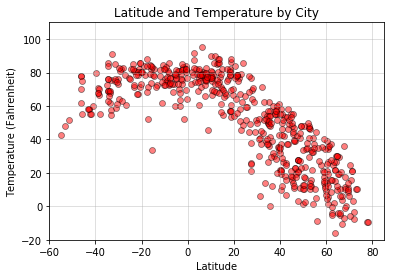

In [43]:
# Create scatter plot figure using matplotlib
# Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(cities_df['Lat'],cities_df['Max Temp (F)'],s=None,marker='o',c="red",alpha=0.5,linewidths=0.75,edgecolors="black")
plt.xlim(-60,85)
plt.ylim(-20,110)
plt.title("Latitude and Temperature by City")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.grid(alpha=0.5)
plt.savefig("LatVSTempPlot.png")
plt.show()

#### Latitude vs. Humidity Plot

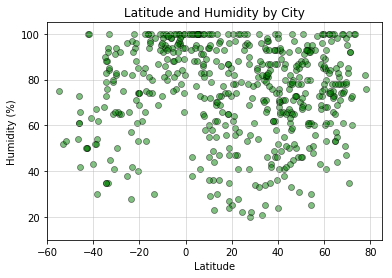

In [42]:
# Create scatter plot figure using matplotlib
# Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(cities_df['Lat'],cities_df['Humidity (%)'],s=None,marker='o',c="green",alpha=0.5,linewidths=0.75,edgecolors="black")
plt.xlim(-60,85)
plt.ylim(10,105)
plt.title("Latitude and Humidity by City")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.5)
plt.savefig("LatVSHumidityPlot.png")
plt.show()

In [38]:
# Find countries between 0 and -20 latitude to determine top 5 countries with the most cities with 100% humidity.
near_eq_df = cities_df[(cities_df['Lat'] < 0) & (cities_df['Lat'] > -20)].groupby('Country')
near_eq_df_city = near_eq_df['City Name']
near_eq_df_city.count()

Country
AO     4
AU     2
BO     1
BR    17
CD     2
CO     1
EC     6
GA     1
ID     8
KE     1
MG     1
MV     1
MW     1
MZ     1
NU     1
PE     7
PF     3
PG     7
SB     2
TL     1
TO     1
TZ     4
VU     2
Name: City Name, dtype: int64

#### Latitude vs. Cloudiness Plot

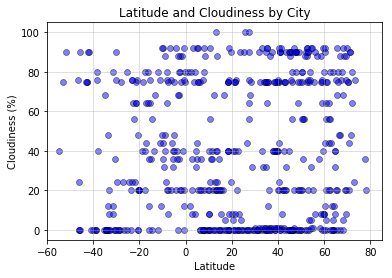

In [41]:
# Create scatter plot figure using matplotlib
# Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(cities_df['Lat'],cities_df['Cloudiness (%)'],s=None,marker='o',c="blue",alpha=0.5,linewidths=0.75,edgecolors="black")
plt.xlim(-60,85)
plt.ylim(-5,105)
plt.title("Latitude and Cloudiness by City")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.5)
plt.savefig("LatVSCloudinessPlot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

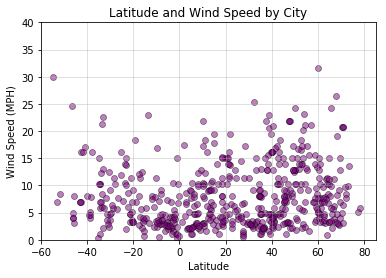

In [44]:
# Create scatter plot figure using matplotlib
# Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(cities_df['Lat'],cities_df['Wind Speed (MPH)'],s=None,marker='o',c="purple",alpha=0.5,linewidths=0.75,edgecolors="black")
plt.xlim(-60,85)
plt.ylim(0,40)
plt.title("Latitude and Wind Speed by City")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(alpha=0.5)
plt.savefig("LatVSWindSpeedPlot.png")
plt.show()